## Kepler et Runge Kutta
## Travail Personel 1, MATH-F-314, Johnston Noémie et Dejardin Tamara

### Contexte

Sous l'effet de la force de pesanteur, deux masses $m_1$ et $m_2$ s'attirent avec des forces mutuellement opposées selon la loi de Newton:
$$ \textbf{F}_{1,2} = -\textbf{F}_{2,1} = -\frac{Gm_1m_2 \textbf{r}}{r^3}$$

Dans l'expression des forces, ${\bf r}$ est le vecteur qui relie le centre de $m_2$ à celui de $m_1$ et $G=6.67408\cdot 10^{-11} {\rm m^3 kg^{−1}s^{−2}}$.

Si les deux masses ne sont sommises qu'à ces forces de pesanteur, leur mouvement relatif sera une section de conique (ellipse, parabole ou hyperbole) dont la nature dépendra des conditions initiales. Dans le cas du système Terre-Lune, celle-ci est une ellipse dont l'équation est:
$$ r(\theta ) = \frac{r_{min}(1+\epsilon)}{1+\epsilon \cos{\theta}}$$

Dans l'équation ci-dessus, $r_{min}$ est la distance minimale Terre-Lune (périgée) et $\epsilon$ est l'excentricité de l'orbite. Ici on prendra, 

$$r_{min}=362600 {\rm km} \\ \epsilon = 0.0549006 \\ m_{\rm terre}=5.972\cdot 10^{24} {\rm kg} \\ m_{\rm lune}=7.348\cdot 10^{22} {\rm kg}$$

Par ailleurs, on indique qu'au périgée de la trajectoire, la lune se déplace à une vitesse de $1083.4 {\rm ms^{-1}}$. 

### Questions

Au cours de tout le travail nous avons considéré le système Terre-Lune comme étant isolé, autrement dit nous n'avons pas tenu compte des autres planètes et astres du système solaire. De plus nous avons considéré les trois corps comme des masses ponctuelles. 

De plus, nous avons mis en gras les vecteurs.

*1) Résoudre les équations du mouvement sous l'effet des forces de pesanteur décrites ci-dessus et montrer que la trajectoire est bien une ellispe avec la bonne excentricité. Indice: placez-vous directement dans le repère attaché à la Terre et écrivez l'équation d'évolution pour ${\bf r}$.
La résolution numérique du problème doit se faire avec la méthode numérique 'Runge-Kutta 4' et les résultats présentés doivent être obtenus avec un pas de temps de $dt=1s$.*

Comme la Lune influence la Terre et la Terre influence la Lune, le référentiel centré en la Terre n'est pas un référentiel inertiel. Nous allons donc commencer par nous placer dans le référentiel du centre de masse (C.M.), qui lui est un référentiel inertiel. La position de la Lune et de la Terre est donnée par la deuxième loi de Newton, $m \ \textbf{a} = \sum F$ , et on aura:

$$\left\{
  \begin{array}{rcr}
   m_L \mathbf{\ddot{r}}_L  & = & -\frac{G m_T m_L}{r^3} \textbf{r} \\
   m_T \mathbf{\ddot{r}}_T & = &  +\frac{G m_T m_L }{r^3} \textbf{r}\\
  \end{array}
\right.$$

où: $ \textbf{r}_L = \text{position de la Lune par rapport au C.M.}\\ \textbf{r}_T = \text{position de la Terre par rapport au C.M.}\\ \textbf{r} = \text{vecteur reliant la Terre à la Lune}\\  m_T = \text{masse de la Terre}\\ m_L = \text{masse de la Lune}$

Ainsi la position relative va nous donner la trajectoire de la Lune par rapport à la Terre. En effet la position relative est donnée par le vecteur $\textbf{r}$, reliant la Terre à la Lune.

$$\mathbf{\ddot{r}} = \mathbf{\ddot{r}}_L - \mathbf{\ddot{r}}_T$$

$$=>\left\{
  \begin{array}{rcr}
   \ddot{x}  & = & -\frac{G (m_T + m_L)}{r^3}x \\
   \ddot{y} & = &  -\frac{G (m_T + m_L) }{r^3}y\\
  \end{array}
\right.$$
Les condiltions initials sont:
$  x_0 = -362600 km\\ y_0 = 0\\ v_{x0}=0\\ v_{y0}=1083.434974 ms^{-1}$

In [37]:
import numpy 
from matplotlib import pyplot
from math import log
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16          
                 

Avant d'appliquer la méthode de RK4, nous allons commencer par définir certaines variables, ainsi que les conditions initiales. Afin d'avoir la trajectoire complète de la Lune nous avons pris comme temps final $29.5$ jours.

In [38]:
T=29.5*86400.0                    #en s
dt = 1.0                          #en s
N = int(T/dt)+1

g=6.67408*10**(-11)               #en m**3 kg**(-1) s**(-2)
mt=5.972*10**(24)                 #en kg
ml=7.348*10**(22)                 #en kg

#conditions initiales       
xi=-362600000.0                    #en m
yi=0.0                             #en m
vx_i=0.0                           #en m/s
vy_i=1083.434974                   #en m/s


Définissons une fonction $f$ qui sera composée d'un vecteur contenant l'accélération et la vitesse de la lune par rapport à $x$ et $y$.

In [39]:
def f(u):
    vx = u[0]
    vy = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([(-x*g*(mt+ml)/(x**2+y**2)**(3/2)),(-y*g*(mt+ml)/(x**2+y**2)**(3/2)),vx,vy])

On remarque que $f$ ne dépend pas explicitement du temps, on a donc légèrement modifié la formule des $k_i \ (i=1,2,3,4)$ dans la définition de RK4.

In [40]:
def rk4(u,f,dt):
    k1=f(u)
    k2=f(u+k1*(dt/2))
    k3=f(u+k2*(dt/2))
    k4=f(u+k3*dt)
    
    return u+(dt/6)*(k1+2*k2+2*k3+k4)

Maintenant que nous avons tout défini, il ne nous reste plus qu'à iterer notre fonction RK4 pour trouver toutes les valeurs de $x$ et $y$ sur toute la trajectoire.

In [41]:
u_rk4 = numpy.empty((N, 4))
u_rk4[0]= numpy.array([vx_i, vy_i, xi, yi])

x_inter=[] 
index=[]
for n in range(N-1):           
    u_rk4[n+1] = rk4(u_rk4[n], f, dt)
    
    if u_rk4[n+1,3]*u_rk4[n,3] <0:
        x_inter.append(u_rk4[n+1,2]) 
        
        index.append(n+1) 

Remarquons que nous avons ajouté deux vecteurs, *x_inter* et *index*, à notre itération de RK4. Ces deux veceturs seront utilisés dans la suite.

*X_inter* nous sert pour le calcul du demi grand axe a. On y stocke les valeurs où x change de signe, soit aux intersections avec l'axe des x.
*Index* nous sert pour le calcul de la période, on y stocke aussi les indices correspondants aux passages de l'axe des abscisses.

Pour la représentation graphique, nous avons procédé de la même manière que dans le MOOC.

(-500000000, 500000000)

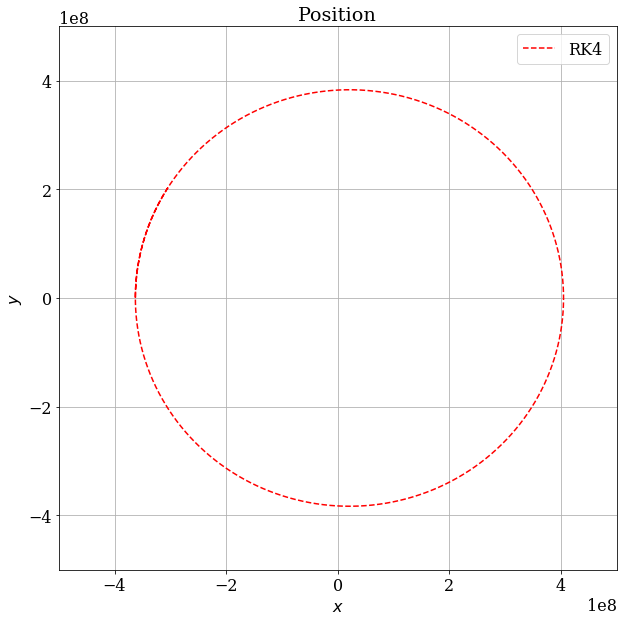

In [42]:
x_plot= u_rk4[:,2]
y_plot= u_rk4[:,3]
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_plot, y_plot, 'r--', label='RK4')
pyplot.title('Position')
pyplot.legend();
pyplot.xlim(-500000000,500000000)
pyplot.ylim(-500000000,500000000)

A première vu on pourrait croire que la trajectoire de la Lune est un cercle, mais en regardant bien on remarque que le centre du cercle ne coïncide pas avec la position de la Terre en $(0,0)$. Il s'agit donc bien d'une ellipse.

Vérifions cela en calculant l'excentricité de cette trajectoire.

L'excentricité théorique vaut: $\epsilon = 0.0549006$
$$ r(\theta)=\frac{r_{min}(1+\epsilon)}{1+\epsilon \cos{\theta}} \\ \\ => \epsilon = \frac{r_{min}-r(\theta)}{r(\theta)\cos{\theta}-r_{min}}$$

Etant donné que nous avons travaillé en coordonnée carthésienne et non polaire, il va falloir récrire $cos(\theta)$ en fonction de $x$ et $y$, et comme cela on aura une position $r$ qui ne dépendra pas de $\theta$ mais de $x$ et $y$.

$$\cos{\theta}=\frac{|x|}{\sqrt{x^2+y^2}}$$

In [43]:
xi=-362600000.0
x = u_rk4[N-1][2]
y = u_rk4[N-1][3]     
    #il faut prendre -xi pour avoir la valeur positive
rt=(x**2+y**2)**(1/2)
e = ((-xi-rt)/(rt*(-x/(x**2+y**2)**(1/2))+xi))
print(e)

0.0549000295602


On a donc trouvé une excentricité de $\epsilon=0.0549000295602$, il s'agit donc bien d'une ellipse: $0< \epsilon<1$. Mais la valeur théorique est $\epsilon=0.0549006$ , on a donc une légère erreur par rapport à cette valeur, ce qui peut être dû au pas de temps choisi.

*2) Que vaut le demi grand axe a et le demi grand axe b selon vos calculs?*

A l'aide de la fonction min et max de python, on peut trouver les extrema de notre trajectoire. En considérant la somme des valeurs absolues des extrema de y, on trouve $2b$. De même avec le vecteur x_inter, qui nous permet de repérer les endroits où la trajectoire change de signe, on trouve $a$. 

In [44]:
max_y = max(y_plot)  
min_y= min(y_plot)
b=((abs(max_y)+abs(min_y))/2)
a=((abs(x_inter[0])+abs(x_inter[1]))/2)
print ("La valeur du demi grand-axe b est ", b, "m")
print ("La valeur du demi grand-axe a est ", a, "m")

La valeur du demi grand-axe b est  383084497.255 m
La valeur du demi grand-axe a est  383663116.433 m


Ici aussi, si l'on considère les valeurs données par Wikipédia par exemple ($a=384 748 km$), on a une légère erreur.

*3) Que vaut la période de l'orbite?*

On a vu l'année passée en mécanique analytique que la période d'une trajectoire elliptique, pour un problème à deux cops, est donnée par:
$$ T= 2\pi \sqrt{\frac{\mu a^3}{k}}$$

avec:  $k=Gm_1m_2$  et  $\mu = \frac{m_1m_2}{m_1+m_2}$

Ainsi pour notre problème, on aura:
$$ T= 2\pi \sqrt{\frac{a^3}{G(m_T+m_L)}}$$

In [45]:
p = 2*numpy.pi*(a**3/(g*(mt+ml)))**(1/2)

print("p =",p,"s")

p = 2350681.80196 s


On peut aussi aussi retrouver la période de l'orbite algorithmiquement, en prenant la 2e valeur dans le vecteur *Index*, qui rend l'indice du moment où la lune revient dans la région des y positifs. Comme notre pas de temps est de 1s, la valeur de cet indice seul nous donne la période (ou en d'autres termes le nombre d'itérations qu'il faut pour revenir au point de départ).

In [46]:
periode=index[1]
print("La periode de l'orbite est de",periode, "secondes")

La periode de l'orbite est de 2350682 secondes


Les deux méthodes donnent donc bien presque la même solution.

Pour des raisons indépendantes de notre volonté, nous avons été obligées de traiter la question 4 en dernier.

*5) Au moment du passage de la lune à l'appogée de sa trajectoire, un astéroïde traverse le centre de l'ellipse avec une vitesse $(v_x,v_y)=(-500 m/s, 500 m/s)$. Modifiez votre code numérique pour calculer la position de cet astéroïde après 14 jours. On suppose que l'astéroïde est dévié par le systeme Terre-Lune mais que celui-ci est trop léger pour modifier la trajectoire de la Terre ou de la lune.*

Nous allons de nouveau nous placer dans le référentiel du centre de masse, et nous allons regarder le mouvement relatif. Dans ce référentiel, les conditions initiales sur la position et la vitesse de l'astéroïde sont données par:
$$x_{ast} = a - \text{périgée}\\ y_{ast}=0 \\ v_x= -500\\ v_y=500$$
De nouveau par la deuxième loi de Newton, on a : $m \ \textbf{a} = \sum F$

*(nous avons pris la convention: $\mathbf{r}_{12}$ désigne le vecteur qui va de 2 vers 1)*

$$m_a \mathbf{\ddot{r}}_a= -G\frac{m_Tm_a}{r_{aT}^3}\mathbf{r}_{aT}-G\frac{m_Lm_a}{r_{aL}^3}\mathbf{r}_{aL}$$

$$m_T \mathbf{\ddot{r}}_T= +G\frac{m_Tm_a}{r_{aT}^3}\mathbf{r}_{aT}+G\frac{m_Lm_T}{r_{LT}^3}\mathbf{r}_{LT}$$

Et le mouvement relatif sera donné par:
$$\mathbf{\ddot{r}}=\mathbf{\ddot{r}}_a-\mathbf{\ddot{r}}_T$$

$$=>\mathbf{\ddot{r}}=-G\frac{m_T}{r_{aT}^3}\mathbf{r}_{aT}-G\frac{m_L}{r_{aL}^3}\mathbf{r}_{aL}-G\frac{m_a}{r_{aT}^3}\mathbf{r}_{aT}-G\frac{m_L}{r_{LT}^3}\mathbf{r}_{LT}$$

Or on suppose que l'influence de l'astéroïde sur le système est négligeable, on peut donc négliger l'avant-dernier terme de l'équation ci-dessus.

$$=>\mathbf{\ddot{r}}=-G\frac{m_T}{r_{aT}^3}\mathbf{r}_{aT}-G\frac{m_L}{r_{aL}^3}\mathbf{r}_{aL}-G\frac{m_L}{r_{LT}^3}\mathbf{r}_{LT}$$

Finalement les équations du mouvement sont:
$$\ddot{x}_a=-G \left (\frac{m_T(x_{a}-x_{T})}{\sqrt{(x_a-x_{T})^2+(y_a-y_{T})^2}^3}+\frac{m_L(x_a-x_L)}{\sqrt{(x_a-x_L)^2+(y_a-y_L)^2}^3} + \frac{m_L(x_L-x_T)}{\sqrt{(x_L-x_T)^2+(y_L-y_T)^2}^3}  \right)$$
$$\ddot{y}_a=-G \left (\frac{m_T(y_{a}-y_{T})}{\sqrt{(x_a-x_{T})^2+(y_a-y_{T})^2}^3}+\frac{m_L(y_a-y_L)}{\sqrt{(x_a-x_L)^2+(y_a-y_L)^2}^3} + \frac{m_L(y_L-y_T)}{\sqrt{(x_L-x_T)^2+(y_L-y_T)^2}^3}  \right)$$

In [47]:
T2=14*86400.0    #Nous voulons bien une trajectoire sur 14 jours
dt2 = 1.0
N2 = int(T2/dt2)+1

xi2=383663116.433-362600000.0
yi2=0.0
vx_i2=-500.0
vy_i2=500.0
xt=0
yt=0



g=6.67408*10**(-11)
mt=5.972*10**(24)
ml=7.348*10**(22)

La statégie appliquée ici est de refaire la méthode de Runge-Kutta, tout en sachant que la position de la Lune changera à chaque itération. Nous construisons pour cela deux vecteurs (un premier pour la position en x, et un second pour la position en y) de la lune à partir des données obtenues dans la première partie avec l'algorithme de Runge-Kutta 4, en démarrant à partir de l'indice où la Lune est à l'apogée. Cet indice correspond au premier élément du vecteur ''index'' (défini à la question 1).

In [56]:
xl=numpy.zeros(N2)
yl=numpy.zeros(N2)
for k in range (index[0],index[0]+(14*86400)):

    xl[k-index[0]]= u_rk4[k,2]
    #xl et yl sont les valeurs trouvées avant via rk4
    yl[k-index[0]] = u_rk4[k,3]


Nous effectuons ensuite une démarche très similaire à la question 1, en définissant une fonction f2 correspondant aux équations à résoudre, en prenant soin d'indicer les composantes de la position de la lune, afin qu'elles changent dans RK4. 

In [53]:
def f2(u2):
    vx2 = u2[0]
    vy2 = u2[1]
    x2 = u2[2]
    y2 = u2[3]
    
    x_2L = -g*((ml*(x2-xl[n]))/((x2-xl[n])**2+(y2-yl[n])**2)**(3/2))
    y_2L = -g*((ml*(y2-yl[n]))/((x2-xl[n])**2+(y2-yl[n])**2)**(3/2))
    x_2T = -g*((mt*(x2-xt))/((x2-xt)**2+(y2-yt)**2)**(3/2))
    y_2T = -g*((mt*(y2-yt))/((x2-xt)**2+(y2-yt)**2)**(3/2))
    x_LT = g*((ml*(xl[n]-xt))/((xl[n]-xt)**2+(yl[n]-yt)**2)**(3/2))
    y_LT = g*((ml*(yl[n]-yt))/((xl[n]-xt)**2+(yl[n]-yt)**2)**(3/2))

    return numpy.array([x_2L+x_2T-x_LT, y_2L+y_2T-y_LT, vx2, vy2])

In [54]:
u_rk42 = numpy.zeros((N2, 4))
u_rk42[0] = numpy.array([vx_i2, vy_i2, xi2, yi2])
for n in range(N2-1):
    
    u_rk42[n+1] = rk4(u_rk42[n], f2, dt2)
print(u_rk42)

[[ -5.00000000e+02   5.00000000e+02   2.10631164e+07   0.00000000e+00]
 [ -5.00898410e+02   4.99999989e+02   2.10626160e+07   4.99999996e+02]
 [ -5.01796863e+02   4.99999957e+02   2.10621146e+07   9.99999972e+02]
 ..., 
 [  3.58968731e+04  -3.35745610e+03   3.15925216e+10  -2.96341369e+09]
 [  3.58968732e+04  -3.35745610e+03   3.15925575e+10  -2.96341704e+09]
 [  3.58968732e+04  -3.35745611e+03   3.15925934e+10  -2.96342040e+09]]


(-5000000, 4000000)

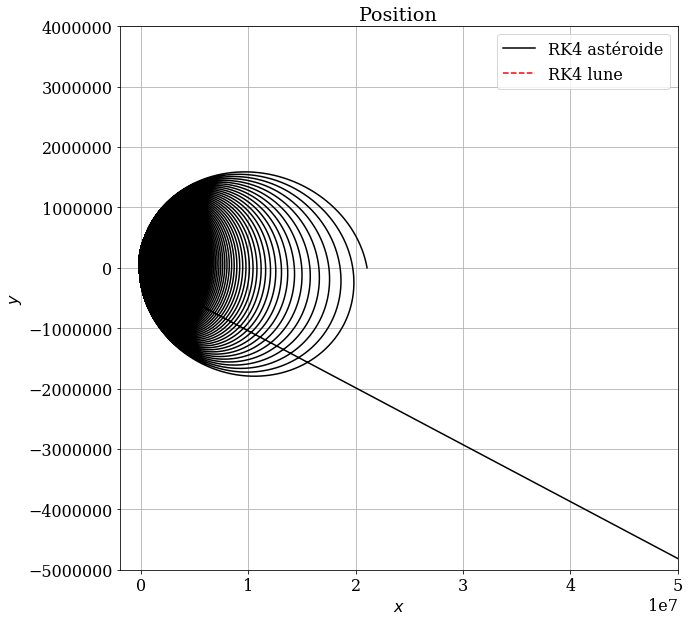

In [55]:
x2_plot= u_rk42[:,2]
y2_plot= u_rk42[:,3]
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x2_plot, y2_plot, 'k-', label='RK4 astéroide')
pyplot.plot(x_plot, y_plot, 'r--', label='RK4 lune')
pyplot.title('Position')
pyplot.legend();
pyplot.xlim(-2000000,50000000)
pyplot.ylim(-5000000,4000000)

Dans le code ci-dessous, nous avons vérifié à l'aide de la fonction numpy.where qu'il existait bien des valeurs de x et y de l'astéroïde plus petites que le rayons de la Terre, ce qui permet de voir s'il y a collision ou pas.

In [61]:
# indices des valeurs plus petites que le rayon de la Terre
idx_collision = numpy.where(u_rk42[2]<6378137)[0]               #rayon equatorial de la Terre = 6378137m (source: Wikipedia)
if len(idx_collision)==0:
    print ('Pas de collision')
else:
    idx_collision = idx_collision[0]
    print ('Il y a collision avec la Terre.')
idy_collision = numpy.where(u_rk42[3]<6378137)[0]
if len(idy_collision)==0:
    print ('Pas de collision')
else:
    idy_collision = idy_collision[0]
    ('Il y a collision avec la Terre.')

Il y a collision avec la Terre.


Sur notre graphique, nous voyons que nous obtenons une trajectoire très petite par rapport à celle de la lune, c'est pourquoi nous avons changé l'échelle, de sorte à bien voir la trajectoire de l'astéroïde. 

Etant donné la direction de la vitesse initiale de l'astéroïde et le fait que la Terre, ayant une plus grande masse, va l'attirer plus fortement, l'astéroïde va se diriger du côté de la Terre. Pendant que l'astéroïde avance, la Lune va elle aussi continuer son parcours autour de la Terre et va se rapprocher de plus en plus de celle-ci. L'astéroïde va alors être de plus en plus attiré vers le système Terre-Lune, ce qui explique les trajectoires de plus en plus resserrées autour de la Terre. 
Grâce au code ci-dessus, on a pu déterminer que l'astéroïde allait entrer en collision avec la Terre. Or comme nous avions considéré nos astres comme des masses ponctuelles, la trajectoire de l'astéroïde ne s'arrête pas avec la collision, mais elle continue vers l'extérieur. 
On peut expliquer cela à l'aide de la conservation de l'énergie mécanique. Etant donné que l'énergie potentielle est proportionnelle à $\frac{1}{r}$, plus $r$ sera petit plus l'énergie potentielle sera grande. Pour compenser cela l'énergie cinétique sera grande là où $r$ sera grand. Autrement dit on aura une forte accélération lorsque l'astéroïde sera proche de la Terre. Ainsi plus la trajectoire se resserrera autour de la Terre, plus l'énergie potentielle sera grande et plus l'astéroïde va gagner en vitesse, jusqu'au point où son énergie cinétique sera assez grande pour qu'il se libère de l'orbite. 



*6) Faites une animation graphique des différentes trajectoires que vous obtenez*

En plus du module du MOOC, nous nous sommes aidés du lien suivant: http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/ pour mieux comprendre le fonctionnement de l'animation. Nous avons également du recalculer avec Runge Kutta la trajectoire de la Lune avec un pas de temps beaucoup plus grand, sans quoi la compilation devenait beaucoup trop longue. Notons également que nous avons choisi de réprésenter les trajectoires de la Lune et de l'astéroïde sur deux animations distinctes; celle de l'astéroïde étant très petite par rapport à la Lune, nous ne voyions pas grand chose.

In [62]:
from matplotlib import animation
from IPython.display import HTML

In [63]:
N3= int(28*86400.0/3000)+1

u_rk4_lune = numpy.zeros((N3, 4))
u_rk4_lune[0]=numpy.array([vx_i, vy_i, xi, yi])

for n in range(N3-1):
    u_rk4_lune[n+1] = rk4(u_rk4_lune[n], f, 3000)


La fonction *init()* permet d'initialiser la première image de l'animation (c'est une des fonctions que nous avons trouvée sur la page web mentionnée plus haut).

In [75]:
def init():
    line.set_data([], [])
    line_terre.set_data([], [])
    return line, line_terre

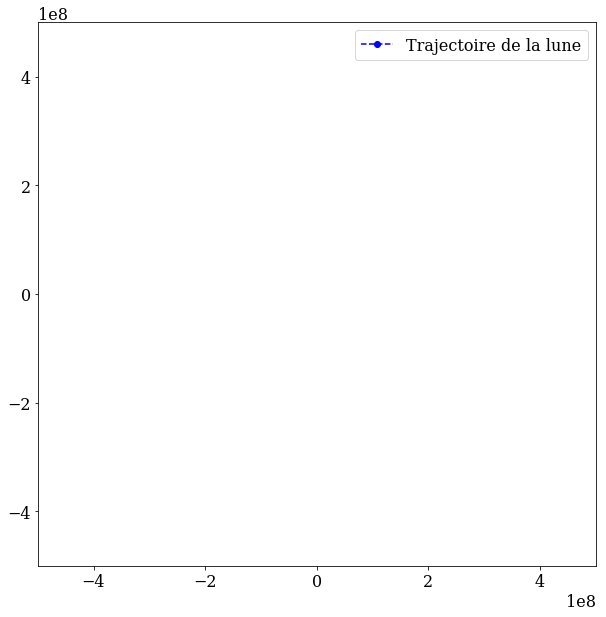

In [76]:
fig = pyplot.figure(figsize=(10,10))
ax = pyplot.axes(xlim=(-500000000,500000000), ylim=(-500000000,500000000))
line = ax.plot([], [], 'bo--')[0]
line_terre = ax.plot([], [], 'bo', color='#805336')[0]
ax.legend(['Trajectoire de la lune'])


La fonction *trajectoire()* indique les données qui doivent, à chaque image i, être affichées.

In [77]:
def trajectoire(i):
    line.set_data(u_rk4_lune[i][2],u_rk4_lune[i][3])
    line_terre.set_data(0,0)
    return line, line_terre

In [78]:
anim = animation.FuncAnimation(fig, trajectoire,
                               frames=N3, interval=100,init_func=init)  
#nous avons choisi cet intervalle afin que l'animation ne soit pas trop longue

In [79]:
HTML(anim.to_html5_video())

Pour l'animation de l'astéroïde, nous avons manoeuvré autrement. Nous avons pris les données sur la position de la lune qui nous ont servis dans l'exercice 4 à calculer la position de l'astéroïde. Comme nous cherchons de nouveau qu'à ne prendre qu'un point toutes les 500 secondes (comme précédemment avec la Lune, pour alléger l'animation), nous créons un vecteur avec des indices qui sont multiples de 500. De plus nous avons réduit la durée de la trajectoire à 5 jours, car l'astéroïde quitte l'orbite avant et que sinon l'animation aurait été trop longue. Nous en prenons un nombre égal à *int(86400x5/500)*, afin de ne pas dépasser 5 jours. Puis nous récupérons les valeurs du résutat de l'exercice 1 correspondants à ces indices. 

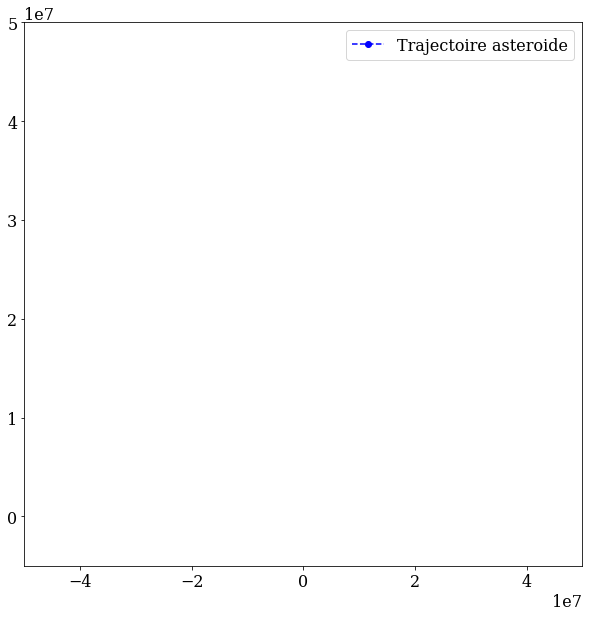

In [104]:
fig = pyplot.figure(figsize=(10,10))
ax = pyplot.axes(xlim=(-50000000,50000000), ylim=(-5000000,50000000))
line2 = ax.plot([], [], 'bo--')[0]
ax.legend(['Trajectoire asteroide'])
def init_ast():
    line2.set_data([], [])
    return line2

In [109]:
frames=int(86400*5/500)
index4=[]
for l in range (frames):
    index4.append(l*500)

position_ast_x=x2_plot[index4]
position_ast_y=x2_plot[index4]
length=len(position_ast_x)

In [110]:
def trajectoire_ast(i):
    line2.set_data(position_ast_x[i],position_ast_y[i])
    return line2

anim = animation.FuncAnimation(fig, trajectoire_ast,
                               frames=length, interval=300,init_func=init_ast)
HTML(anim.to_html5_video())

Etant donné le grand intervalle de temps utilisé, et le fait que l'astéroïde effectue plusieurs rotations en 5 jours, on a une animation assez grossière et sacadée de la trajectoire. On remarque par contre le mouvement autour de la terre qui rétrécit avec le temps, ce qui correspond bien au graphique trouvé précédement. 

*4)Quel est l'ordre de la méthode numérique utilisée? *

Dans cette question, nous avons utilisé un code quasi-identique à celui proposé dans les modules du MOOC.

In [28]:
dt_values = numpy.array([3.0, 1.0, 0.5])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N=int(T/dt)+1
    
    u_rk4 = numpy.zeros((N, 4))
    u_rk4[0] = numpy.array([vx_i, vy_i, xi, yi])
    
    for n in range(N-1):
    
        u_rk4[n+1] = rk4(u_rk4[n], f, dt)
        
    u_values[i] = u_rk4

In [29]:
def get_diffgrid(u_current, u_fine, dt):

    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = int(numpy.ceil(N_fine/N_current))
    
    diffgrid = dt * numpy.sum( numpy.abs(u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

In [30]:
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):

    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

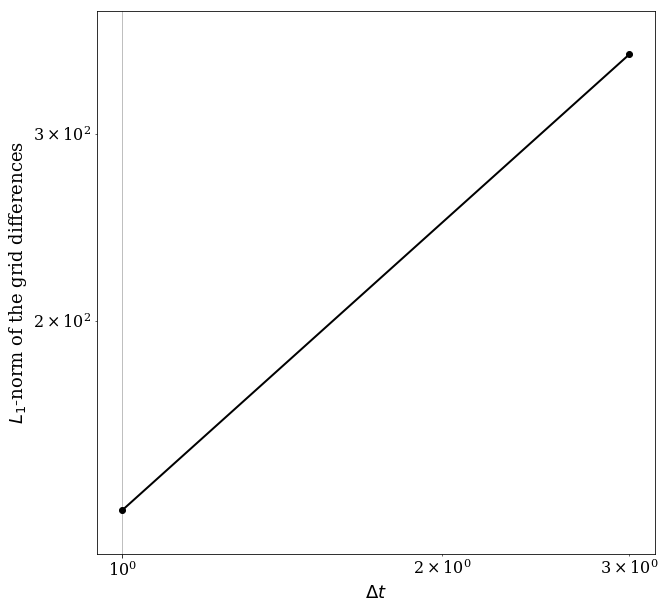

In [31]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

L'ordre de convergence est donné par:
$$\alpha = \frac{\log{\left ( \frac{f_3-f_2}{f_2-f_1} \right )}}{\log{r}}$$
Nous avons choisi une valeur de h de telle sorte que les différences de pas pour chaque grille soient suffisamment grandes.

In [32]:
r = 2
h = 500   #pour avoir une grande différence

dt_values2 = numpy.array([h, r*h, r**2*h])
u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)
diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N=int(T/dt)+1
    
    u_rk4 = numpy.zeros((N, 4))
    u_rk4[0] = numpy.array([vx_i, vy_i, xi, yi])
    
    for n in range(N-1):
        
        u_rk4[n+1] = rk4(u_rk4[n], f, dt)
        
    u_values2[i] = u_rk4
#f(2)-f(1)   
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])
#f(3)-f(2)
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

alpha = (log(diffgrid2[1])-log(diffgrid2[0]))/log(r)

print(alpha)

4.020971462668298


On voit que nous obtenons bien l'ordre de convergence voulu (4) pour autant que le pas h soit suffisamment grand.